# Statsmodels for time series data

In python, a very widely used library named statsmodel is used when dealing with time series data. It is based on the statistical programming language R. This module helps in analyzing data, perform statistical functions and also create statistical models. It also has functions to plot. 

### Importing packages

The basic packages like numpy and pandas to help deal with data are imported along with matplotlib to help with plottings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then the statsmodel is also imported.

In [2]:
import statsmodels.api as sm

### Obtain data
The statsmodels has a provision to obtain dataset. There are various datasets and the one that will be used is the macrodata since it is a time series data. Using the load_pandas() method, the data will be loaded.

In [3]:
data = sm.datasets.macrodata.load_pandas().data

In [4]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
data.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


To understand what the column headings mean, we can print the details using the NOTE attribute.

In [6]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

Now to work with time series, it is important to have the year column as the index. So accordingly it is changed by using the time series analysis (tsa) module of statsmodels. It has a method called dates_from_range where the range can be mentioned. We take the start to be 1959 year of first quarter (Q1) and end to be 2009 of third quarter (Q3). Using pandas an index will be created of this. 

In [7]:
idx = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

Now that the index is created, we can assign it to the dataframe.

In [8]:
data.index = idx
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Visualization

Linear plot of the DPI is plotted to see the trend.

<AxesSubplot:>

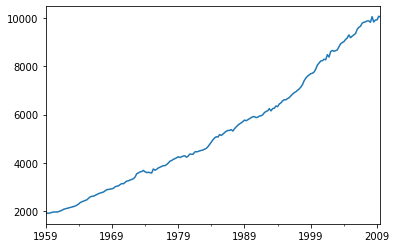

In [9]:
data['realdpi'].plot()

The statsmodel can be useful in getting the estimated trend. A filter is used which is called as Hodrick-Prescott filter. This filter distinguishes a time series data into a trend and a cyclic component. When this filter is applied it return a tuple which consists of the estimated cycle and the trend.

In [10]:
dpi = sm.tsa.filters.hpfilter(data['realdpi'])
dpi

(1959-03-31     32.611738
 1959-06-30     45.961546
 1959-09-30     23.190972
 1959-12-31     18.550907
 1960-03-31     23.077748
                  ...    
 2008-09-30   -128.596455
 2008-12-31    -87.557288
 2009-03-31   -122.358968
 2009-06-30    -11.941350
 2009-09-30    -89.467814
 Name: realdpi_cycle, Length: 203, dtype: float64,
 1959-03-31     1854.288262
 1959-06-30     1873.738454
 1959-09-30     1893.209028
 1959-12-31     1912.749093
 1960-03-31     1932.422252
                   ...     
 2008-09-30     9966.896455
 2008-12-31    10007.957288
 2009-03-31    10048.758968
 2009-06-30    10089.441350
 2009-09-30    10130.067814
 Name: realdpi_trend, Length: 203, dtype: float64)

Now using the tuple unpacking, the trend is extracted and then plotted.

In [11]:
dpi_cycle,dpi_trend = sm.tsa.filters.hpfilter(data['realdpi'])

In [12]:
data['trend'] = dpi_trend

<AxesSubplot:>

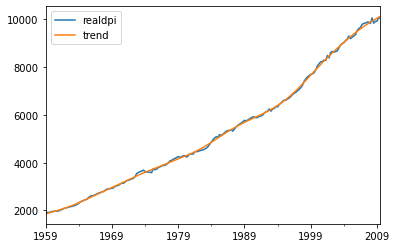

In [13]:
data[['realdpi','trend']].plot()

Let's zoom in to get a better idea of the plot.

<AxesSubplot:>

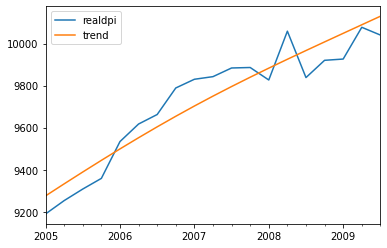

In [16]:
data[['realdpi','trend']]['2005-01-01':].plot()